In [96]:
import numpy as np
import os
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.feature import hog
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [97]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Internship/Shoe_Type/Shoe_Type'
categories = os.listdir(data_dir)
print(categories)

['nike', 'adidas', 'converse']


In [98]:
len(os.listdir('/content/drive/MyDrive/Colab Notebooks/Internship/Shoe_Type/Shoe_Type/adidas'))

275

In [99]:
len(os.listdir('/content/drive/MyDrive/Colab Notebooks/Internship/Shoe_Type/Shoe_Type/converse'))

275

In [100]:
 len(os.listdir('/content/drive/MyDrive/Colab Notebooks/Internship/Shoe_Type/Shoe_Type/nike'))

275

In [101]:
adidasepath=os.path.join('/content/drive/MyDrive/Colab Notebooks/Internship/Shoe_Type/Shoe_Type','adidas')
for img in os.listdir(adidasepath):
 print(img)

117.jpg
104.jpg
114.jpg
107.jpg
10.jpg
106.jpg
115.jpg
100.jpg
0.jpg
1.jpg
113.jpg
103.jpg
109.jpg
110.jpg
112.jpg
111.jpg
101.jpg
12.jpg
102.jpg
116.jpg
11.jpg
119.jpg
118.jpg
108.jpg
105.jpg
147.jpg
156.jpg
140.jpg
158.jpg
139.jpg
142.jpg
13.jpg
146.jpg
133.jpg
15.jpg
149.jpg
138.jpg
150.jpg
159.jpg
126.jpg
141.jpg
144.jpg
128.jpg
124.jpg
129.jpg
130.jpg
162.jpg
154.jpg
148.jpg
16.jpg
155.jpg
166.jpg
135.jpg
160.jpg
152.jpg
136.jpg
165.jpg
164.jpg
167.jpg
122.jpg
120.jpg
125.jpg
134.jpg
153.jpg
168.jpg
132.jpg
137.jpg
127.jpg
163.jpg
131.jpg
121.jpg
145.jpg
157.jpg
143.jpg
123.jpg
14.jpg
161.jpg
151.jpg
169.jpg
194.jpg
193.jpg
202.jpg
170.jpg
180.jpg
215.jpg
186.jpg
177.jpg
212.jpg
18.jpg
171.jpg
214.jpg
184.jpg
204.jpg
201.jpg
188.jpg
173.jpg
21.jpg
217.jpg
190.jpg
181.jpg
221.jpg
195.jpg
213.jpg
199.jpg
210.jpg
175.jpg
172.jpg
198.jpg
179.jpg
197.jpg
203.jpg
219.jpg
182.jpg
176.jpg
17.jpg
211.jpg
218.jpg
189.jpg
2.jpg
178.jpg
205.jpg
19.jpg
196.jpg
220.jpg
216.jpg
187.jpg
200.jpg
2

In [102]:
conversepath=os.path.join('/content/drive/MyDrive/Colab Notebooks/Internship/Shoe_Type/Shoe_Type','converse')
for img in os.listdir(conversepath):
 print(img)

108.jpg
120.jpg
101.jpg
123.jpg
12.jpg
127.jpg
117.jpg
114.jpg
107.jpg
113.jpg
126.jpg
130.jpg
103.jpg
131.jpg
0.jpg
1.jpg
10.jpg
102.jpg
110.jpg
128.jpg
13.jpg
11.jpg
105.jpg
115.jpg
121.jpg
100.jpg
129.jpg
118.jpg
116.jpg
104.jpg
106.jpg
125.jpg
109.jpg
111.jpg
119.jpg
124.jpg
122.jpg
112.jpg
175.jpg
145.jpg
153.jpg
185.jpg
155.jpg
167.jpg
144.jpg
136.jpg
146.jpg
149.jpg
182.jpg
186.jpg
178.jpg
166.jpg
150.jpg
177.jpg
141.jpg
151.jpg
157.jpg
158.jpg
180.jpg
137.jpg
174.jpg
152.jpg
134.jpg
173.jpg
133.jpg
159.jpg
17.jpg
18.jpg
142.jpg
138.jpg
16.jpg
147.jpg
156.jpg
171.jpg
140.jpg
176.jpg
132.jpg
184.jpg
15.jpg
154.jpg
164.jpg
163.jpg
183.jpg
143.jpg
161.jpg
139.jpg
162.jpg
14.jpg
170.jpg
172.jpg
165.jpg
169.jpg
168.jpg
181.jpg
179.jpg
148.jpg
160.jpg
135.jpg
209.jpg
198.jpg
228.jpg
227.jpg
2.jpg
236.jpg
200.jpg
233.jpg
192.jpg
226.jpg
235.jpg
205.jpg
189.jpg
214.jpg
187.jpg
231.jpg
196.jpg
223.jpg
20.jpg
225.jpg
23.jpg
211.jpg
234.jpg
207.jpg
199.jpg
194.jpg
204.jpg
210.jpg
193.jpg
2

In [103]:
nikepath=os.path.join('/content/drive/MyDrive/Colab Notebooks/Internship/Shoe_Type/Shoe_Type','nike')
for img in os.listdir(nikepath):
 print(img)

117.jpg
144.jpg
1.jpg
109.jpg
107.jpg
141.jpg
135.jpg
132.jpg
105.jpg
143.jpg
139.jpg
140.jpg
129.jpg
145.jpg
123.jpg
11.jpg
142.jpg
115.jpg
113.jpg
103.jpg
126.jpg
102.jpg
118.jpg
133.jpg
120.jpg
121.jpg
137.jpg
131.jpg
104.jpg
128.jpg
110.jpg
134.jpg
12.jpg
10.jpg
111.jpg
106.jpg
119.jpg
122.jpg
146.jpg
124.jpg
14.jpg
125.jpg
101.jpg
0.jpg
138.jpg
114.jpg
130.jpg
100.jpg
108.jpg
112.jpg
136.jpg
147.jpg
127.jpg
13.jpg
116.jpg
173.jpg
154.jpg
152.jpg
159.jpg
172.jpg
169.jpg
161.jpg
165.jpg
179.jpg
20.jpg
151.jpg
187.jpg
178.jpg
160.jpg
198.jpg
197.jpg
167.jpg
149.jpg
155.jpg
189.jpg
191.jpg
184.jpg
199.jpg
181.jpg
182.jpg
16.jpg
175.jpg
193.jpg
19.jpg
18.jpg
148.jpg
186.jpg
164.jpg
171.jpg
194.jpg
17.jpg
190.jpg
156.jpg
150.jpg
185.jpg
177.jpg
192.jpg
188.jpg
196.jpg
168.jpg
15.jpg
166.jpg
163.jpg
162.jpg
183.jpg
195.jpg
158.jpg
153.jpg
180.jpg
174.jpg
170.jpg
176.jpg
2.jpg
157.jpg
215.jpg
201.jpg
248.jpg
23.jpg
242.jpg
241.jpg
234.jpg
239.jpg
235.jpg
200.jpg
210.jpg
22.jpg
244.jpg
216

In [104]:
X = []
y = []
image_size = (64, 64)

In [105]:
for label, category in enumerate(categories):
    path = os.path.join(data_dir, category)
    for file in os.listdir(path):
        try:
            img = imread(os.path.join(path, file))
            img_resized = resize(img, image_size)
            img_gray = rgb2gray(img_resized)
            hog_features = hog(img_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
            X.append(hog_features)
            y.append(label)
        except Exception as e:
            print(f"Error loading image {file}: {e}")

In [106]:
X = np.array(X)
y = np.array(y)


In [107]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [108]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf']})

In [109]:
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.6121212121212121
Confusion Matrix:
 [[32  7 16]
 [16 29 10]
 [ 8  7 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.58      0.58        55
           1       0.67      0.53      0.59        55
           2       0.61      0.73      0.66        55

    accuracy                           0.61       165
   macro avg       0.62      0.61      0.61       165
weighted avg       0.62      0.61      0.61       165



In [110]:
image='/content/Converse_test.jpg'
img=imread(image)
img_resized = resize(img, image_size)  # Use the image_size defined earlier (64, 64)
img_gray = rgb2gray(img_resized)       # Convert to grayscale
hog_features = hog(img_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2)) # Extract HOG features
# The model expects a 2D array for prediction, even for a single sample, so we reshape
img_processed = hog_features.reshape(1, -1)

In [111]:
pred = grid.best_estimator_.predict(img_processed) # Use the best estimator from the trained grid
if pred == 0:
  print('nike')
elif pred == 1:
    print('adidas')
else:
  print('converse')

converse


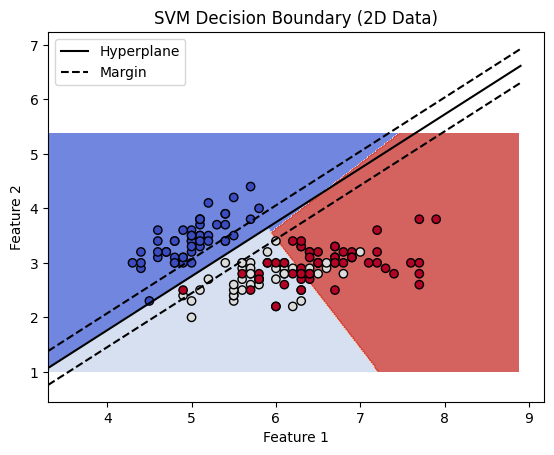

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Load a 2D dataset for demonstration
iris = datasets.load_iris()
X = iris.data[:, :2]  # We take the first two features for visualization
y = iris.target

# Train an SVM model on the 2D data
svm_model = svm.SVC(kernel='linear', C=1).fit(X, y)

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary (2D Data)')


# Plot the hyperplane and margins - only for linear kernel
if isinstance(svm_model, svm.SVC) and svm_model.kernel == 'linear':
    w = svm_model.coef_[0]
    a = -w[0] / w[1]
    xx_hyperplane = np.linspace(x_min, x_max)
    yy_hyperplane = a * xx_hyperplane - (svm_model.intercept_[0]) / w[1]
    plt.plot(xx_hyperplane, yy_hyperplane, 'k-', label='Hyperplane')

    margin = 1 / np.sqrt(np.sum(svm_model.coef_ ** 2))
    yy_down = yy_hyperplane - np.sqrt(1 + a ** 2) * margin
    yy_up = yy_hyperplane + np.sqrt(1 + a ** 2) * margin
    plt.plot(xx_hyperplane, yy_down, 'k--', label='Margin')
    plt.plot(xx_hyperplane, yy_up, 'k--')

plt.legend()
plt.show()